# Week 1: Feature Matching Report

This notebook implements the first milestone of the CS436 project: **Setup & Feature Matching**.

It imports the core logic from `src/feature_matching.py` to perform the following steps:
1.  Load two images from our `data/` dataset.
2.  Detect and compute SIFT features for both images.
3.  Match features using a Brute-Force matcher.
4.  Filter the matches using **Lowe's Ratio Test**.
5.  Visualize the final, high-quality matches.

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import sys

# -- This is a trick to import our .py file from the parent 'src' directory --
# We add the parent directory to the system path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.feature_matching import find_and_filter_matches

print("Setup complete. Modules imported successfully.")

Setup complete. Modules imported successfully.


In [2]:
# -- 1. Load Images --

# Define the paths to your images in the data folder
# IMPORTANT: Change these to two of your image names!
IMG_NAME_1 = 'IMG_4180.jpeg'
IMG_NAME_2 = 'IMG_4181.jpeg'

data_dir = os.path.join(module_path, 'data')
img_path1 = os.path.join(data_dir, IMG_NAME_1)
img_path2 = os.path.join(data_dir, IMG_NAME_2)

# Load the images using OpenCV
# cv2.IMREAD_GRAYSCALE is often used, but loading in color is fine.
img1 = cv2.imread(img_path1, cv2.IMREAD_COLOR)
img2 = cv2.imread(img_path2, cv2.IMREAD_COLOR)

# Check if images loaded correctly
if img1 is None or img2 is None:
    print(f"Error: Could not load images. Check paths:")
    print(f"Path 1: {img_path1}")
    print(f"Path 2: {img_path2}")
else:
    print(f"Successfully loaded {IMG_NAME_1} and {IMG_NAME_2}")
    # Convert to RGB for matplotlib display (OpenCV loads as BGR)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

Successfully loaded IMG_4180.jpeg and IMG_4181.jpeg


In [3]:
# -- 2. Find, Filter, and Visualize Matches --

# Call our function from the .py module
good_matches, kp1, kp2, match_visualization = find_and_filter_matches(img1, img2, lowe_ratio=0.75)

Found 113631 keypoints in img1 and 103946 in img2.
Found 113631 initial matches.
Filtered down to 1936 good matches using Lowe's ratio test.



Displaying 1936 filtered matches.


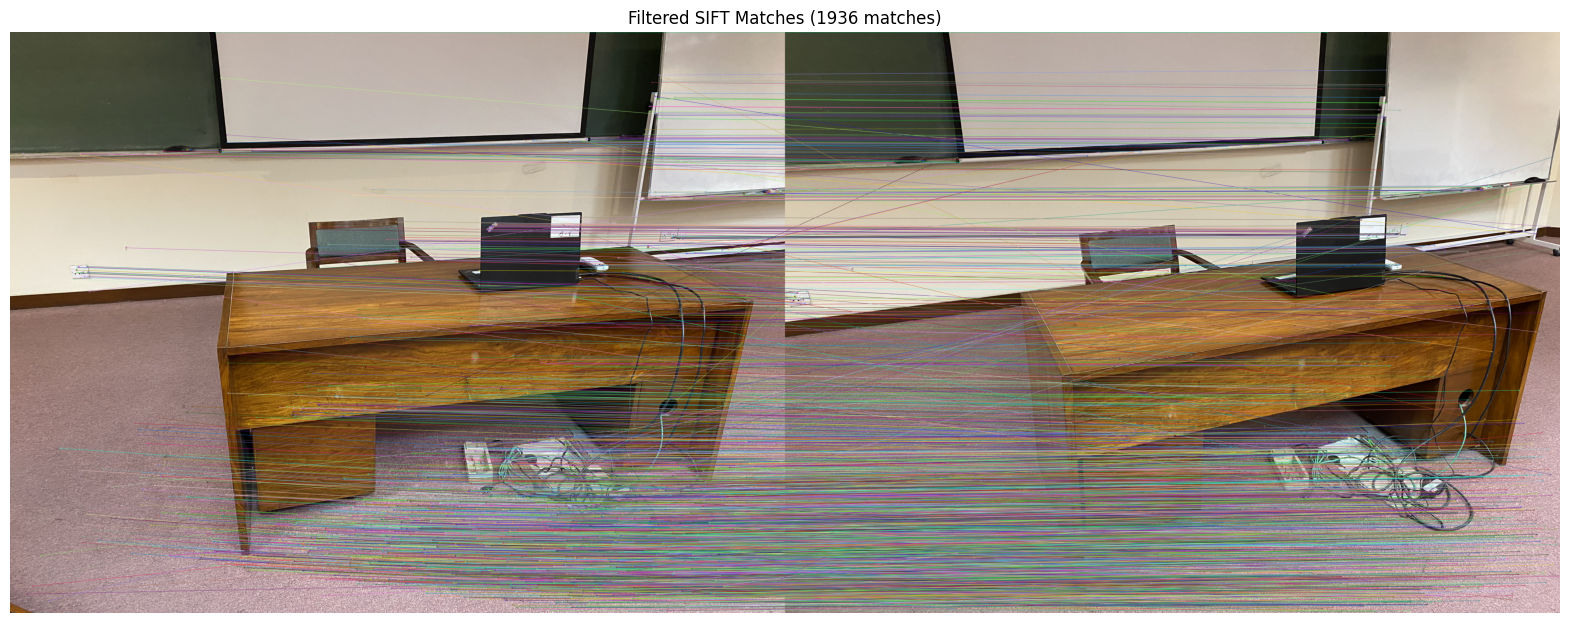

Saved visualization to matches_IMG_4180_IMG_4181.png


In [4]:
# -- 3. Display the Result --

print(f"\nDisplaying {len(good_matches)} filtered matches.")

# Display the visualization using matplotlib
# We make it large to see the details
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(match_visualization, cv2.COLOR_BGR2RGB))
plt.title(f"Filtered SIFT Matches ({len(good_matches)} matches)")
plt.axis('off')
plt.show()

# -- 4. Save the Visualization --
# This is a good practice for your report
output_filename = f"matches_{IMG_NAME_1.split('.')[0]}_{IMG_NAME_2.split('.')[0]}.png"
cv2.imwrite(output_filename, match_visualization)
print(f"Saved visualization to {output_filename}")